In [1]:
import warnings
warnings.filterwarnings('ignore')

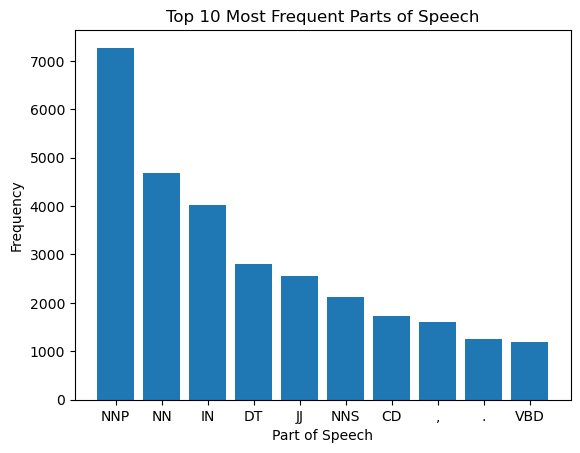

In [2]:
import requests
from bs4 import BeautifulSoup
import nltk
import matplotlib.pyplot as plt

# retrieve website content
url = "https://hindenburgresearch.com/adani/"
response = requests.get(url)
html_content = response.content

# extract text content from HTML
soup = BeautifulSoup(html_content, 'html.parser')
text = soup.get_text()

# tokenize text into words
tokens = nltk.word_tokenize(text)

# tag part of speech for each word
pos_tags = nltk.pos_tag(tokens)

# count number of occurrences for each part of speech
pos_counts = {}
for word, pos in pos_tags:
    if pos in pos_counts:
        pos_counts[pos] += 1
    else:
        pos_counts[pos] = 1

# sort the parts of speech by frequency
sorted_pos_counts = sorted(pos_counts.items(), key=lambda x: x[1], reverse=True)

# extract the top 10 most frequent parts of speech
top_10_pos = dict(sorted_pos_counts[:10])

# plot the results
plt.bar(top_10_pos.keys(), top_10_pos.values())
plt.title("Top 10 Most Frequent Parts of Speech")
plt.xlabel("Part of Speech")
plt.ylabel("Frequency")
plt.show()


### Number of Biasing Adjective are used

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\junai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\junai\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\junai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


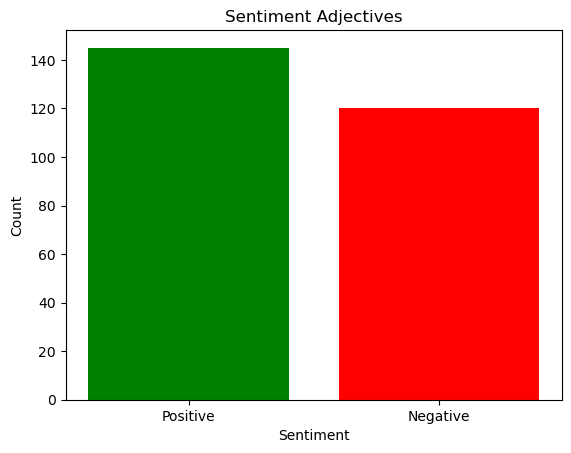

In [3]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

# Tokenize text into sentences and words
sentences = nltk.sent_tokenize(text)
words = nltk.word_tokenize(text)

# Perform POS tagging on words
tagged_words = nltk.pos_tag(words)

# Identify adjectives with negative and positive polarity
sid = SentimentIntensityAnalyzer()
biasing_adjectives = {'positive': [], 'negative': []}
for word, tag in tagged_words:
    if tag == 'JJ':
        score = sid.polarity_scores(word)
        if score['neg'] > 0.5:
            biasing_adjectives['negative'].append(word)
        elif score['pos'] > 0.5:
            biasing_adjectives['positive'].append(word)

# Plot the results
labels = ['Positive', 'Negative']
values = [len(biasing_adjectives['positive']), len(biasing_adjectives['negative'])]
colors = ['g', 'r']
plt.bar(labels, values, color=colors)
plt.title('Sentiment Adjectives')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [5]:
# Print the results
print("Number of Biasing Adjectives with Negative Sentiment/Tone:", len(biasing_adjectives['negative']))
print("Biasing Adjectives with Negative Sentiment/Tone:")
for adjective in biasing_adjectives['negative']:
    print("- " + adjective)
print("Number of Biasing Adjectives with Positive Sentiment/Tone:", len(biasing_adjectives['positive']))
print("Biasing Adjectives with Positive Sentiment/Tone:")
for adjective in biasing_adjectives['positive']:
    print("- " + adjective)

Number of Biasing Adjectives with Negative Sentiment/Tone: 120
Biasing Adjectives with Negative Sentiment/Tone:
- critical
- suspected
- notorious
- negative
- critical
- broken
- stifled
- low
- low
- negative
- aggressive
- serious
- negative
- unstable
- forced
- inadequate.
- criminal
- illegal
- scams
- Illegal
- illegal
- denied
- vague
- suspect
- screwed.
- suspected
- critical
- suspect
- insensitive
- complaint
- suspicious
- suspicious
- blind
- notorious
- criminal
- unclear
- difficult
- leaked
- leaked
- suspicious
- suspicious
- fraudulent
- suspect
- suspicious
- suspicious
- Suspicious
- Suspicious
- Suspicious
- critical
- suspicious
- critical
- suspected
- suspicious
- suspect
- Notorious
- low
- serious
- notorious
- fake
- fake
- Fraudulent
- fraudulent
- notorious
- Notorious
- questionable
- Suspicious
- suspect
- suspicious
- strange
- bizarre
- vague
- vague
- limited
- suspicious
- unclear
- unclear
- unsecured
- Suspicious
- Suspect
- Suspicious
- odd
- uncl

### Number of times a phrase citing anonymous sources ("according to many" or "critics say" "a former  trader" "a PR expert") 

In [6]:
import re

# Define regex pattern for anonymous source phrases
pattern = r"(according to|critics say|a former \w+|a PR expert)\b"

# Find all matches of pattern in webpage text
matches = re.findall(pattern, response.text)

# Count number of matches
num_anonymous_sources = len(matches)

# Print the results
print("Number of Anonymous Sources Cited:", num_anonymous_sources)
print("Anonymous Source Phrases:")
for phrase in matches:
    print("- " + phrase)


Number of Anonymous Sources Cited: 52
Anonymous Source Phrases:
- according to
- according to
- according to
- according to
- a former senior
- according to
- according to
- according to
- according to
- according to
- according to
- a former investment
- according to
- according to
- a former Elara
- according to
- according to
- according to
- according to
- according to
- according to
- according to
- according to
- according to
- according to
- according to
- according to
- according to
- according to
- according to
- according to
- a former director
- according to
- a former director
- according to
- according to
- according to
- according to
- according to
- a former managing
- according to
- a former director
- according to
- according to
- according to
- a former director
- a former Adani
- according to
- according to
- according to
- according to
- according to


### Number of  times a phrase citing a named source us used "According to Jim Smith" "According to the Bank of India"

In [7]:
import requests
import re


# Define regex pattern for named source phrases
pattern = r"According to\s+(?:\w+\s+)*\w+"

# Find all matches of pattern in webpage text
matches = re.findall(pattern, response.text)

# Count number of matches
num_named_sources = len(matches)

# Print the results
print("Number of Named Sources Cited:", num_named_sources)
print("Named Source Phrases:")
for phrase in matches:
    print("- " + phrase)


Number of Named Sources Cited: 11
Named Source Phrases:
- According to numerous sources we spoke with
- According to local media
- According to emails from a suspected
- According to the allegations
- According to Adani Power
- According to a 2014 DRI
- According to our searches via leading information database Prime
- According to the investigation
- According to campaign group
- According to court records
- According to our calculations


### Relative share of anonymous to non-anonymous; anonymous to total; and non-anonymous to total

In [8]:
import requests
import re


# Define regex patterns for anonymous and named source phrases
anonymous_pattern = r"According to\s+sources"
named_pattern = r"According to\s+(?:\w+\s+)*\w+"

# Find all matches of each pattern in webpage text
response = requests.get("https://hindenburgresearch.com/adani/")
anonymous_matches = re.findall(anonymous_pattern, response.text)
named_matches = re.findall(named_pattern, response.text)

# Count number of matches
num_anonymous = len(anonymous_matches)
num_named = len(named_matches)
total_citations = num_anonymous + num_named

# Calculate relative shares
anonymous_share = num_anonymous / total_citations
named_share = num_named / total_citations
anonymous_to_total_share = num_anonymous / total_citations
named_to_total_share = num_named / total_citations

# Check if num_anonymous is not zero before calculating named_to_anonymous_share
if num_anonymous != 0:
    named_to_anonymous_share = num_named / num_anonymous
else:
    named_to_anonymous_share = 0

# Print the results
print("Relative Share of Anonymous Sources:", anonymous_share)
print("Relative Share of Named Sources:", named_share)
print("Share of Anonymous Sources to Total Citations:", anonymous_to_total_share)
print("Share of Named Sources to Total Citations:", named_to_total_share)
print("Share of Named Sources to Anonymous Sources:", named_to_anonymous_share)


Relative Share of Anonymous Sources: 0.0
Relative Share of Named Sources: 1.0
Share of Anonymous Sources to Total Citations: 0.0
Share of Named Sources to Total Citations: 1.0
Share of Named Sources to Anonymous Sources: 0


### Average Length of Paragraph

In [9]:
# calculate average length of paragraphs
paragraphs = soup.find_all('p')
num_paragraphs = len(paragraphs)
total_length = sum(len(p.get_text()) for p in paragraphs)
avg_length = total_length / num_paragraphs
print("Number of Paragraphs:", num_paragraphs)
print("Average Length of Paragraphs:", avg_length)


Number of Paragraphs: 592
Average Length of Paragraphs: 227.13006756756758


### Amount of bold to non-bold text

In [10]:
# calculate amount of bold text
bold_text = "".join([p.get_text() for p in soup.find_all('b')])
bold_percentage = (len(bold_text) / total_length) * 100
non_bold_percentage = 100 - bold_percentage
print("Percentage of Bold Text:", bold_percentage)
print("Percentage of Non-Bold Text:", non_bold_percentage)

Percentage of Bold Text: 0.0
Percentage of Non-Bold Text: 100.0


### Number of heading vs number of lines of body text

In [11]:
# calculate number of headings vs body text lines
headings = soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])
num_headings = len(headings)
num_body_lines = len(text.split('\n')) - num_headings
print("Number of Headings:", num_headings)
print("Number of Body Text Lines:", num_body_lines)


Number of Headings: 143
Number of Body Text Lines: 999


### Ratio of Image to Text

In [12]:


# calculate ratio of images to text while taking screen real estate into account
img_tags = soup.find_all('img')
total_img_size = sum(int(img.get('width', 0)) * int(img.get('height', 0)) for img in img_tags)
total_text_size = len(text) * avg_length
ratio = total_img_size / (total_img_size + total_text_size)




print("Ratio of Images to Text:", ratio)


Ratio of Images to Text: 0.2789853246447779


### Number of repeated Phrases Verbatim

In [13]:
from collections import Counter
# tokenize text into sentences
sentences = nltk.sent_tokenize(text)

# count occurrences of each sentence
counts = Counter(sentences)

# find repeated phrases
repeated_phrases = [phrase for phrase, count in counts.items() if count > 1]

# print results
print("Number of Repeated Phrases Verbatim:", len(repeated_phrases))
print("Repeated Phrases Verbatim:")
for phrase in repeated_phrases:
    print(f"- {phrase}")

Number of Repeated Phrases Verbatim: 10
Repeated Phrases Verbatim:
- Historical archives of its website show that it had only 4 partners and 11 employees.
- Records show it pays INR 32,000 (U.S. $435 in 2021) in monthly office rent.
- This report relates solely to the valuation of securities traded outside of India.
- This report does not constitute a recommendation on securities.
- [Pg.
- (Source: DRI investigative records [Pg.
- [Pgs.
- Many of these entities later appear in suspect transactions, often funneling assets into or out of the Adani Group companies.
- (Source: Carmichael Rail and Port Singapore Holdings 2015 Annual Report [Pg.
- What is the explanation for the lack of required disclosure?


### Number of Repeated Claims

In [14]:
import nltk
nltk.download('brown')
from textblob import TextBlob
# create TextBlob object and tag claims
blob = TextBlob(text)
claims = [str(chunk) for chunk in blob.noun_phrases if 'claim' in chunk.lower()]

# count occurrences of each claim
counts = Counter(claims)

# find repeated claims
repeated_claims = [claim for claim, count in counts.items() if count > 1]

# print results
print("Number of Repeated Claims:", len(repeated_claims))
print("Repeated Claims:")
for claim in repeated_claims:
    print(f"- {claim}")

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\junai\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


Number of Repeated Claims: 0
Repeated Claims:


### Number of Link to Social Media

In [15]:
# extract links from HTML
soup = BeautifulSoup(html_content, 'html.parser')
links = [link.get('href') for link in soup.find_all('a')]

# count links to social media and self-hosting document sites
social_media_count = 0
self_hosting_count = 0

for link in links:
    if link is not None:
        if "facebook.com" in link or "twitter.com" in link or "linkedin.com" in link:
            social_media_count += 1
        elif "slideshare.net" in link or "scribd.com" in link:
            self_hosting_count += 1

# print results
print("Number of Links to Social Media:", social_media_count)
print("Number of Links to Self-Hosting Document Sites:", self_hosting_count)

Number of Links to Social Media: 31
Number of Links to Self-Hosting Document Sites: 238


### Number of Link Source and Number of Bad Link

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://hindenburgresearch.com/adani/"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract all links from the webpage
links = []
for link in soup.find_all('a'):
    links.append(link.get('href'))

# Check each link for status code
linked_sources = []
bad_link_count = 0

for link in links:
    try:
        response = requests.get(link)
        if response.status_code == 200:
            linked_sources.append(link)
        else:
            bad_link_count += 1
    except requests.exceptions.RequestException as e:
        bad_link_count += 1

# Print the results
print("Linked Sources:")
for source in linked_sources:
    print(f"- {source}")
print("Number of Bad Links:", bad_link_count)
